# Football Player Analysis Template

### Welcome! If you're interested on getting a Python Template to have a better understanding of some of your favorite football player you're in the right place! 
### In this python script we're mainly going to use:
* **FBRef**: This site is a bible for every football stats fan! Huge thanks to them for creating this huge and easy-to-scrape football library
* **Pandas**: To optimize the dataframe that we're going to scrape
* **MPL Soccer**: The best library for football analysis visualization! Also huge thanks to them

### Here you're going to find an example on how to use it *(Gyokeres 23/24 VS Nunez 21/22)* but feel free to use the template and use your creativity to modify it! 

In [287]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt
import re

In [288]:
# First of all we have to take the dataframe from fbref and visualize that
data_gyo = pd.read_html("https://fbref.com/en/players/4d5a9185/scout/12244/Viktor-Gyokeres-Scouting-Report")
data_gyo

[              Standard Stats                  
                    Statistic Per 90 Percentile
 0          Non-Penalty Goals   0.65       88.0
 1       npxG: Non-Penalty xG   0.48       83.0
 2                Shots Total   3.34       76.0
 3                    Assists   0.36       99.0
 4   xAG: Exp. Assisted Goals   0.24       94.0
 5                 npxG + xAG   0.72       91.0
 6      Shot-Creating Actions   4.20       99.0
 7                        NaN    NaN        NaN
 8           Passes Attempted  25.26       91.0
 9          Pass Completion %  72.6%       68.0
 10        Progressive Passes   1.51       50.0
 11       Progressive Carries   3.84       96.0
 12       Successful Take-Ons   2.22       96.0
 13         Touches (Att Pen)   8.86       99.0
 14    Progressive Passes Rec  11.02       99.0
 15                       NaN    NaN        NaN
 16                   Tackles   0.47       27.0
 17             Interceptions   0.14       40.0
 18                    Blocks   0.47    

In [289]:
data_nunez = pd.read_html("https://fbref.com/en/players/4d77b365/scout/11269/Darwin-Nunez-Scouting-Report")
data_nunez 

[              Standard Stats                  
                    Statistic Per 90 Percentile
 0          Non-Penalty Goals   1.00       99.0
 1       npxG: Non-Penalty xG   0.69       99.0
 2                Shots Total   3.69       96.0
 3                    Assists   0.18       86.0
 4   xAG: Exp. Assisted Goals   0.25       89.0
 5                 npxG + xAG   0.94       96.0
 6      Shot-Creating Actions   3.23       81.0
 7                        NaN    NaN        NaN
 8           Passes Attempted  21.36       59.0
 9          Pass Completion %  62.5%       16.0
 10        Progressive Passes   1.73       46.0
 11       Progressive Carries   3.87       99.0
 12       Successful Take-Ons   1.78       91.0
 13         Touches (Att Pen)   8.74       99.0
 14    Progressive Passes Rec  10.11       99.0
 15                       NaN    NaN        NaN
 16                   Tackles   0.64       54.0
 17             Interceptions   0.23       49.0
 18                    Blocks   0.59    

In [290]:
#Now we're going to transform the data from a list to a df
data_gyo = pd.concat(data_gyo)
data_nunez = pd.concat(data_nunez)

In [291]:
data_gyo 

,"(Standard Stats, Statistic)","(Standard Stats, Per 90)","(Standard Stats, Percentile)",Rk,Player,Nation,Squad,Compare
0,Non-Penalty Goals,0.65,88.0,NaN,NaN,NaN,NaN,NaN
1,npxG: Non-Penalty xG,0.48,83.0,NaN,NaN,NaN,NaN,NaN
2,Shots Total,3.34,76.0,NaN,NaN,NaN,NaN,NaN
3,Assists,0.36,99.0,NaN,NaN,NaN,NaN,NaN
4,xAG: Exp. Assisted Goals,0.24,94.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
164,Ball Recoveries,2.83,65,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Aerials Won,2.05,53,NaN,NaN,NaN,NaN,NaN
167,Aerials Lost,2.15,78,NaN,NaN,NaN,NaN,NaN


In [292]:
#Now we can delete the useless column 
data_gyo = data_gyo.drop(columns=['Rk', 'Nation', 'Squad', 'Compare', 'Player'])
data_nunez = data_nunez.drop(columns=['Rk', 'Nation', 'Squad', 'Compare', 'Player'])

In [293]:
# We can now renames columns using a mapping dictionary
data_gyo.rename(columns={
    ('Standard Stats', 'Statistic'): 'Statistics',
    ('Standard Stats', 'Per 90'): 'Per 90',
    ('Standard Stats', 'Percentile'): 'Percentile'
}, inplace=True)

# We can now renames columns using a mapping dictionary
data_nunez.rename(columns={
    ('Standard Stats', 'Statistic'): 'Statistics',
    ('Standard Stats', 'Per 90'): 'Per 90',
    ('Standard Stats', 'Percentile'): 'Percentile'
}, inplace=True)

In [294]:
#Drop Null values
data_gyo = data_gyo.dropna()
data_nunez = data_nunez.dropna()

In [295]:
data_gyo 

,Statistics,Per 90,Percentile
0,Non-Penalty Goals,0.65,88.0
1,npxG: Non-Penalty xG,0.48,83.0
2,Shots Total,3.34,76.0
3,Assists,0.36,99.0
4,xAG: Exp. Assisted Goals,0.24,94.0
...,...,...,...
163,Own Goals,0.00,50
164,Ball Recoveries,2.83,65
166,Aerials Won,2.05,53
167,Aerials Lost,2.15,78


In [296]:
data_nunez

,Statistics,Per 90,Percentile
0,Non-Penalty Goals,1.00,99.0
1,npxG: Non-Penalty xG,0.69,99.0
2,Shots Total,3.69,96.0
3,Assists,0.18,86.0
4,xAG: Exp. Assisted Goals,0.25,89.0
...,...,...,...
163,Own Goals,0.00,51
164,Ball Recoveries,2.32,1
166,Aerials Won,1.18,88
167,Aerials Lost,1.73,21


In [297]:
# To make the analysis work best, we create a Function to format numbers with a comma
def formatta_numero(numero):
    if isinstance(numero, str):
        try:
            float(numero)
            return '{:,.2f}'.format(float(numero)).replace('.', ',')
        except ValueError:
            return numero
    elif isinstance(numero, (int, float)):
        # If the value is an integer or float, it formats directly
        return '{:,.2f}'.format(numero).replace('.', ',')
    else:
        return numero




In [298]:
# We can now applies  formatting to numbers in the "For 90" and "Percentile" columns.
data_gyo['Per 90'] = data_gyo['Per 90'].apply(formatta_numero)
data_gyo['Percentile'] = data_gyo['Percentile'].apply(formatta_numero)

data_nunez['Per 90'] = data_nunez['Per 90'].apply(formatta_numero)
data_nunez['Percentile'] = data_nunez['Percentile'].apply(formatta_numero)

In [299]:
data_nunez

,Statistics,Per 90,Percentile
0,Non-Penalty Goals,"1,00","99,00"
1,npxG: Non-Penalty xG,"0,69","99,00"
2,Shots Total,"3,69","96,00"
3,Assists,"0,18","86,00"
4,xAG: Exp. Assisted Goals,"0,25","89,00"
...,...,...,...
163,Own Goals,"0,00","51,00"
164,Ball Recoveries,"2,32","1,00"
166,Aerials Won,"1,18","88,00"
167,Aerials Lost,"1,73","21,00"


In [300]:
data_nunez.set_index('Statistics', inplace=True)
data_gyo.set_index('Statistics', inplace=True)

In [301]:
#We can now exctract the columns that we think are going to be the most useful for our analysis

stats_to_extract = [
    'Goals',
    'Assists',
    'xG: Expected Goals',
    'xAG: Exp. Assisted Goals',
    'Shots Total',
    'Goals/Shot',
    'Aerials Won',
    'Goal-Creating Actions',
    'Key Passes',
    'Passes Completed',
    'Shot-Creating Actions',
    'Touches',
    'Touches (Mid 3rd)',
    'Touches (Att 3rd)',
    'Touches (Att Pen)',
    'Progressive Carries'
]



In [302]:

data_gyo = data_gyo.loc[stats_to_extract]
data_nunez = data_nunez.loc[stats_to_extract]

In [303]:
#Drop Duplicates 
data_gyo = data_gyo.drop_duplicates()
data_nunez = data_nunez.drop_duplicates()

In [304]:
#Reset the index to transpose the dataframe
data_gyo = data_gyo.reset_index()
data_nunez = data_nunez.reset_index()

In [305]:
#If you use old data, like the Nunez one, you have to make some more scraping. The first precentile is about all the league, the second one is about the top 5 league + Champions League and Europa League. I'm using the second one also for Gyokeres, so i cut the first one from 
# Nunez df, but it's up to you. 

data_nunez = data_nunez.drop_duplicates(subset=['Statistics'], ignore_index=True)
data_nunez


,Statistics,Per 90,Percentile
0,Goals,"1,18","99,00"
1,Assists,"0,18","86,00"
2,xG: Expected Goals,"0,84","99,00"
3,xAG: Exp. Assisted Goals,"0,25","89,00"
4,Shots Total,"3,69","96,00"
5,Goals/Shot,"0,27","99,00"
6,Aerials Won,"1,18","16,00"
7,Goal-Creating Actions,"0,59","89,00"
8,Key Passes,"1,37","91,00"
9,Passes Completed,"13,35","46,00"


In [306]:
data_gyo = data_gyo.transpose()
data_nunez = data_nunez.transpose()

In [307]:
#We have to set which parameter we're going to use for the Radar Plot
params = ['Goals', 'Assists', 'xG: Expected Goals', 'xAG: Exp. Assisted Goals', 'Aerials Won', 'Goal-Creating Actions', 'Key Passes', 'Touches (Att 3rd)', 'Progressive Carries']

#And decide how to setup the radar plot
low =  [0.1, 0.1, 0.1, 0.1, 0.3, 0.2, 1, 1, 2]
high = [1.25, 0.6, 1.25, 1.25, 2.5, 2, 2, 4, 4.5]



In [308]:
data_gyo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Statistics,Goals,Assists,xG: Expected Goals,xAG: Exp. Assisted Goals,Shots Total,Goals/Shot,Aerials Won,Goal-Creating Actions,Key Passes,Passes Completed,Shot-Creating Actions,Touches,Touches (Mid 3rd),Touches (Att 3rd),Touches (Att Pen),Progressive Carries
Per 90,"0,79","0,36","0,59","0,24","3,34","0,19","2,05","0,72","1,69","18,34","4,20","39,80","12,63","26,41","8,86","3,84"
Percentile,"94,00","99,00","94,00","94,00","76,00","79,00","53,00","94,00","96,00","86,00","99,00","91,00","42,00","99,00","99,00","96,00"


In [309]:
data_gyo.columns = data_gyo.iloc[0]
data_gyo = data_gyo.iloc[1:]
data_gyo

Statistics,Goals,Assists,xG: Expected Goals,xAG: Exp. Assisted Goals,Shots Total,Goals/Shot,Aerials Won,Goal-Creating Actions,Key Passes,Passes Completed,Shot-Creating Actions,Touches,Touches (Mid 3rd),Touches (Att 3rd),Touches (Att Pen),Progressive Carries
Per 90,"0,79","0,36","0,59","0,24","3,34","0,19","2,05","0,72","1,69","18,34","4,20","39,80","12,63","26,41","8,86","3,84"
Percentile,"94,00","99,00","94,00","94,00","76,00","79,00","53,00","94,00","96,00","86,00","99,00","91,00","42,00","99,00","99,00","96,00"


In [310]:
data_nunez

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Statistics,Goals,Assists,xG: Expected Goals,xAG: Exp. Assisted Goals,Shots Total,Goals/Shot,Aerials Won,Goal-Creating Actions,Key Passes,Passes Completed,Shot-Creating Actions,Touches,Touches (Mid 3rd),Touches (Att 3rd),Touches (Att Pen),Progressive Carries
Per 90,"1,18","0,18","0,84","0,25","3,69","0,27","1,18","0,59","1,37","13,35","3,23","33,52","9,66","22,59","8,74","3,87"
Percentile,"99,00","86,00","99,00","89,00","96,00","99,00","16,00","89,00","91,00","46,00","81,00","66,00","4,00","94,00","99,00","99,00"


In [311]:
data_nunez.columns = data_nunez.iloc[0]
data_nunez = data_nunez.iloc[1:]
data_nunez

Statistics,Goals,Assists,xG: Expected Goals,xAG: Exp. Assisted Goals,Shots Total,Goals/Shot,Aerials Won,Goal-Creating Actions,Key Passes,Passes Completed,Shot-Creating Actions,Touches,Touches (Mid 3rd),Touches (Att 3rd),Touches (Att Pen),Progressive Carries
Per 90,"1,18","0,18","0,84","0,25","3,69","0,27","1,18","0,59","1,37","13,35","3,23","33,52","9,66","22,59","8,74","3,87"
Percentile,"99,00","86,00","99,00","89,00","96,00","99,00","16,00","89,00","91,00","46,00","81,00","66,00","4,00","94,00","99,00","99,00"


In [312]:
data_nunez_radar = data_nunez[params]
data_nunez_radar = data_nunez_radar.replace(',', '.', regex=True)

data_nunez_radar

Statistics,Goals,Assists,xG: Expected Goals,xAG: Exp. Assisted Goals,Aerials Won,Goal-Creating Actions,Key Passes,Touches (Att 3rd),Progressive Carries
Per 90,1.18,0.18,0.84,0.25,1.18,0.59,1.37,22.59,3.87
Percentile,99.00,86.00,99.00,89.00,16.00,89.00,91.00,94.00,99.00


In [313]:
data_gyo_radar = data_gyo[params]
data_gyo_radar = data_gyo_radar.replace(',', '.', regex=True)

data_gyo_radar

Statistics,Goals,Assists,xG: Expected Goals,xAG: Exp. Assisted Goals,Aerials Won,Goal-Creating Actions,Key Passes,Touches (Att 3rd),Progressive Carries
Per 90,0.79,0.36,0.59,0.24,2.05,0.72,1.69,26.41,3.84
Percentile,94.00,99.00,94.00,94.00,53.00,94.00,96.00,99.00,96.00


In [314]:
#Now the boring part. I wasn't able to find a way to extract the data and put it as list for the radarplot. So we have to copy it manually
nunez_values = [1.18, 0.18, 0.84, 0.25, 1.18, 0.59, 1.37, 22.59, 3.87]
gyo_values = [0.82, 0.37, 0.61, 0.25, 1.94, 0.71, 1.71, 26.76, 3.87]

In [315]:
#Import the various font
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [316]:
#Create the radar
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

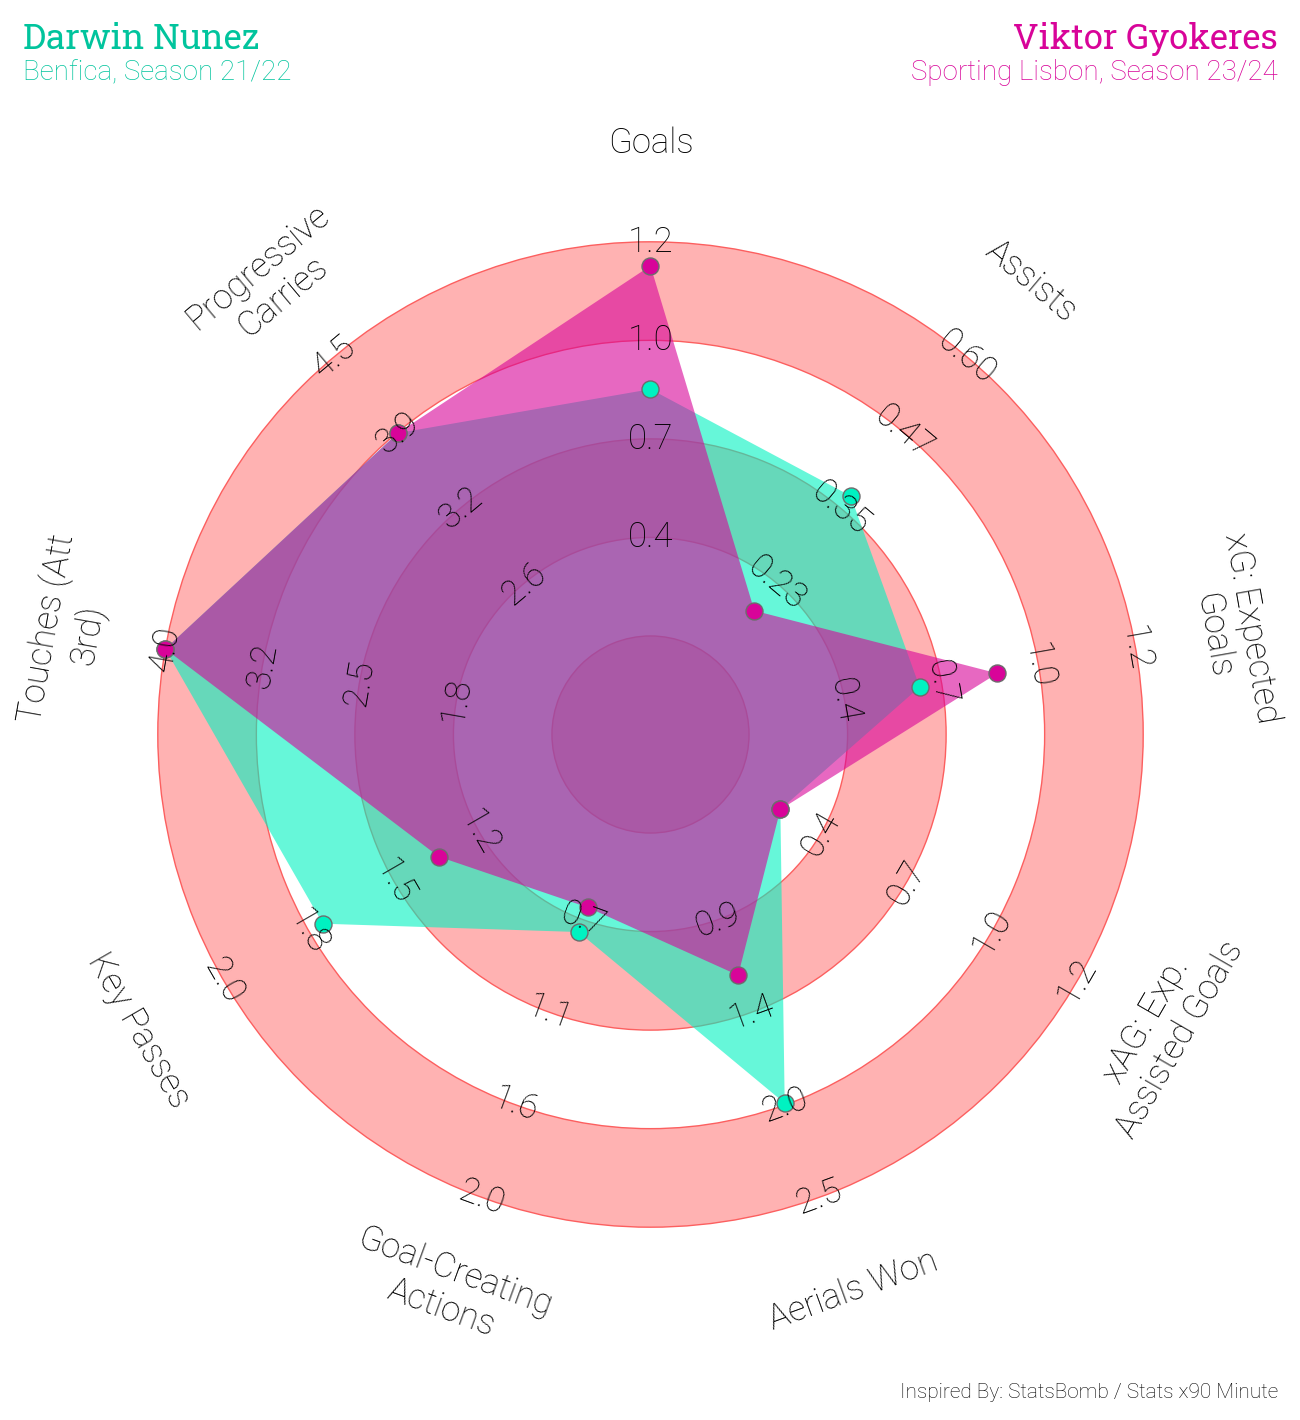

In [317]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(gyo_values, nunez_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By: StatsBomb / Stats x90 Minute', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Darwin Nunez', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Benfica, Season 21/22', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Viktor Gyokeres', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, 'Sporting Lisbon, Season 23/24', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')


# **Percentile**
## Credits to: Aaron Moniz -> https://aaronmoniz.com/projects/data-visualization-creating-percentile-polar-axis-charts-in-python/

In [318]:
import math
import matplotlib
import matplotlib.image as image
from matplotlib import artist
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Franklin Gothic Medium', 'Franklin Gothic Book']

In [319]:
data_gyo_radar

Statistics,Goals,Assists,xG: Expected Goals,xAG: Exp. Assisted Goals,Aerials Won,Goal-Creating Actions,Key Passes,Touches (Att 3rd),Progressive Carries
Per 90,0.79,0.36,0.59,0.24,2.05,0.72,1.69,26.41,3.84
Percentile,94.00,99.00,94.00,94.00,53.00,94.00,96.00,99.00,96.00


In [320]:
data_nunez_radar 

Statistics,Goals,Assists,xG: Expected Goals,xAG: Exp. Assisted Goals,Aerials Won,Goal-Creating Actions,Key Passes,Touches (Att 3rd),Progressive Carries
Per 90,1.18,0.18,0.84,0.25,1.18,0.59,1.37,22.59,3.87
Percentile,99.00,86.00,99.00,89.00,16.00,89.00,91.00,94.00,99.00


In [321]:
nunez_percentile = data_nunez_radar.iloc[1]
nunez_percentile = pd.DataFrame(nunez_percentile)
nunez_percentile

,Percentile
Statistics,
Goals,99.00
Assists,86.00
xG: Expected Goals,99.00
xAG: Exp. Assisted Goals,89.00
Aerials Won,16.00
Goal-Creating Actions,89.00
Key Passes,91.00
Touches (Att 3rd),94.00
Progressive Carries,99.00


In [322]:
nunez_percentile = data_nunez_radar
nunez_percentile = nunez_percentile.drop(nunez_percentile.index[0])
nunez_percentile['Players'] = 'DarwinNunez'


nunez_percentile


Statistics,Goals,Assists,xG: Expected Goals,xAG: Exp. Assisted Goals,Aerials Won,Goal-Creating Actions,Key Passes,Touches (Att 3rd),Progressive Carries,Players
Percentile,99.00,86.00,99.00,89.00,16.00,89.00,91.00,94.00,99.00,DarwinNunez


In [323]:
#We have o create a list for this specific graph
player_name = "Darwin Nunez"
percentiles = [99.00, 86.00, 16.00, 89.00, 91.00, 94.00]

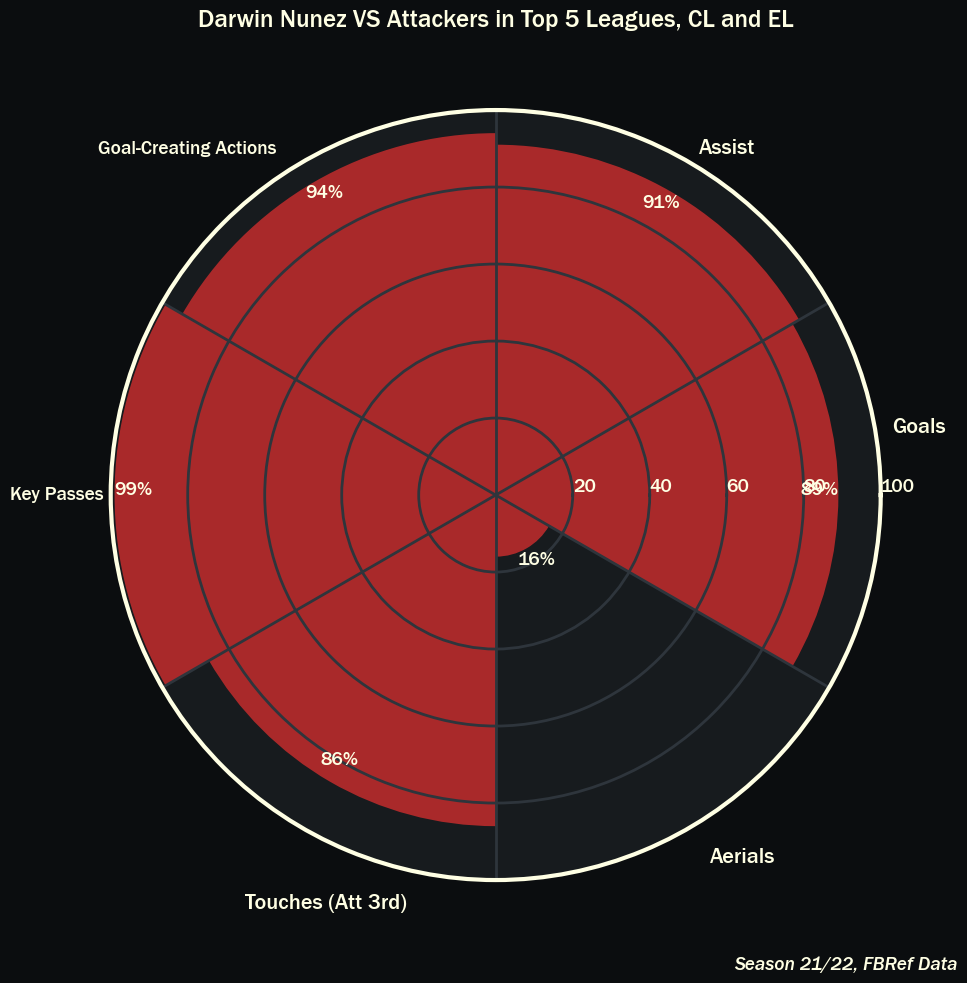

In [324]:
    #Adding theta 
    theta = np.linspace(np.pi/1, 2*np.pi + np.pi/1, len(percentiles), endpoint=False)

    # Aesthetic Detail
    plt.figure(figsize=(10, 10), facecolor='#0b0d0f')
    ax = plt.subplot(111, projection='polar')
    ax.set_facecolor('#171b1e')
    ax.grid(True, color='#2e353c', linewidth=2)  # Aggiornamento dello spessore delle linee divisorie
    ax.tick_params(axis='x', colors='xkcd:off white')
    ax.tick_params(axis='y', colors='xkcd:off white')
    ax.set_rlim(0, 100)
    ax.spines['polar'].set_color('xkcd:off white')
    ax.spines['polar'].set_linewidth(3)
    ax.set_rlabel_position(0)
    ax.set_rticks([20, 40, 60, 80, 100])
    ax.tick_params(labelsize=14)
    labels = plt.thetagrids(range(30, 390, 60), ('', '', '', '', '', ''))
    ax.spines['polar'].set_color('xkcd:off white')
    ax.spines['polar'].set_linewidth(3)

    # Color to add
    bars = ax.bar(theta, percentiles, width=math.pi/3, color='#E83030', alpha=0.7)  # Colore verde scuro

    # text to add
    plt.text(0.5, 1.13, "Darwin Nunez VS Attackers in Top 5 Leagues, CL and EL", \
            horizontalalignment='center', verticalalignment='top', color='xkcd:off white', size=18, \
            transform=ax.transAxes)
    plt.text(1.1, -0.075, '\nSeason 21/22, FBRef Data', \
            horizontalalignment='right', verticalalignment='top', color='xkcd:off white', \
            style='italic', transform=ax.transAxes, size=14)
    plt.text(1.05, 0.6, "Goals", \
            horizontalalignment='center', verticalalignment='top', color='xkcd:off white', \
            transform=ax.transAxes, size=16,)
    plt.text(0.8, 0.95, "Assist", \
            horizontalalignment='center', verticalalignment='center', color='xkcd:off white',\
            transform=ax.transAxes, size=16,)
    plt.text(0.1, 0.95, "Goal-Creating Actions", \
            horizontalalignment='center', verticalalignment='center', color='xkcd:off white',\
            transform=ax.transAxes, size=14)
    plt.text(-0.07, 0.5, "Key Passes", \
            horizontalalignment='center', verticalalignment='center', color='xkcd:off white',\
            transform=ax.transAxes, size=14)
    plt.text(0.28, -0.03, "Touches (Att 3rd)", \
            horizontalalignment='center', verticalalignment='center', color='xkcd:off white',\
            transform=ax.transAxes, size=16)
    plt.text(0.82, 0.03, "Aerials", \
            horizontalalignment='center', verticalalignment='center', color='xkcd:off white',\
            transform=ax.transAxes, size=16)

    
    label_adjuster = lambda r: 5 if r < 20 else -5
    for i in range(len(percentiles)):
        plt.annotate(str(int(round(percentiles[i])))+"%", (theta[i], percentiles[i] + label_adjuster(percentiles[i])), color='xkcd:off white', \
                    horizontalalignment='center', fontsize=14)

    plt.show()




In [325]:
gyo_percentile = data_gyo_radar.iloc[1]
gyo_percentile = pd.DataFrame(gyo_percentile)
gyo_percentile

,Percentile
Statistics,
Goals,94.00
Assists,99.00
xG: Expected Goals,94.00
xAG: Exp. Assisted Goals,94.00
Aerials Won,53.00
Goal-Creating Actions,94.00
Key Passes,96.00
Touches (Att 3rd),99.00
Progressive Carries,96.00


In [326]:
gyo_percentile = data_gyo_radar
gyo_percentile = gyo_percentile.drop(gyo_percentile.index[0])
gyo_percentile['Players'] = 'Viktor Gyokeres'


gyo_percentile


Statistics,Goals,Assists,xG: Expected Goals,xAG: Exp. Assisted Goals,Aerials Won,Goal-Creating Actions,Key Passes,Touches (Att 3rd),Progressive Carries,Players
Percentile,94.00,99.00,94.00,94.00,53.00,94.00,96.00,99.00,96.00,Viktor Gyokeres


In [327]:
#Same for Gyo
player_name = "Viktor Gyokeres"
percentiles_gyo = [94.00, 99.00, 53.00, 94.00, 96.00, 94.00]

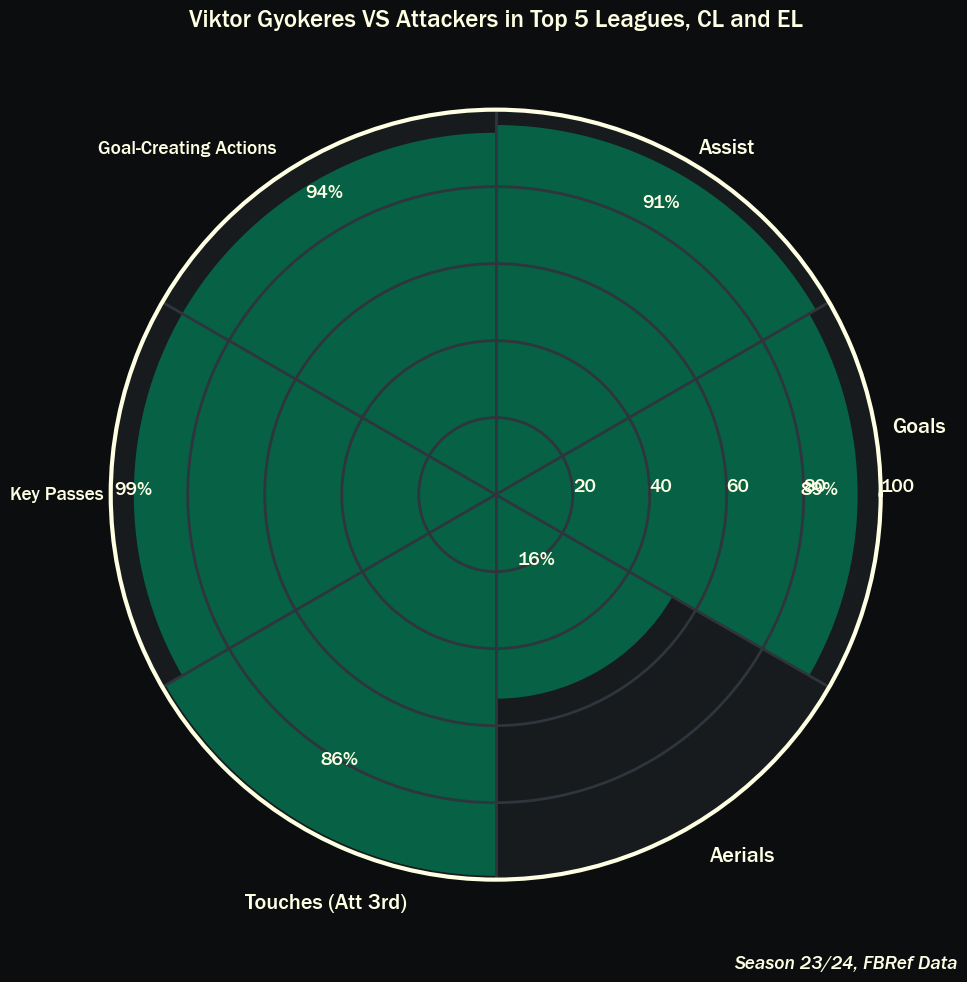

In [328]:

theta = np.linspace(np.pi/1, 2*np.pi + np.pi/1, len(percentiles_gyo), endpoint=False)
#Aesthetic details
plt.figure(figsize=(10, 10), facecolor='#0b0d0f')
ax = plt.subplot(111, projection='polar')
ax.set_facecolor('#171b1e')
ax.grid(True, color='#2e353c', linewidth=2)  # Aggiornamento dello spessore delle linee divisorie
ax.tick_params(axis='x', colors='xkcd:off white')
ax.tick_params(axis='y', colors='xkcd:off white')
ax.set_rlim(0, 100)
ax.spines['polar'].set_color('xkcd:off white')
ax.spines['polar'].set_linewidth(3)
ax.set_rlabel_position(0)
ax.set_rticks([20, 40, 60, 80, 100])
ax.tick_params(labelsize=14)
labels = plt.thetagrids(range(30, 390, 60), ('', '', '', '', '', ''))
ax.spines['polar'].set_color('xkcd:off white')
ax.spines['polar'].set_linewidth(3)

# Creating the bars with color
bars = ax.bar(theta, percentiles_gyo, width=math.pi/3, color='#008057', alpha=0.7) 

# text to add
plt.text(0.5, 1.13, "Viktor Gyokeres VS Attackers in Top 5 Leagues, CL and EL", \
         horizontalalignment='center', verticalalignment='top', color='xkcd:off white', size=18, \
         transform=ax.transAxes)
plt.text(1.1, -0.075, '\nSeason 23/24, FBRef Data', \
         horizontalalignment='right', verticalalignment='top', color='xkcd:off white', \
         style='italic', transform=ax.transAxes, size=14)
plt.text(1.05, 0.6, "Goals", \
         horizontalalignment='center', verticalalignment='top', color='xkcd:off white', \
         transform=ax.transAxes, size=16,)
plt.text(0.8, 0.95, "Assist", \
         horizontalalignment='center', verticalalignment='center', color='xkcd:off white',\
         transform=ax.transAxes, size=16,)
plt.text(0.1, 0.95, "Goal-Creating Actions", \
         horizontalalignment='center', verticalalignment='center', color='xkcd:off white',\
         transform=ax.transAxes, size=14)
plt.text(-0.07, 0.5, "Key Passes", \
         horizontalalignment='center', verticalalignment='center', color='xkcd:off white',\
         transform=ax.transAxes, size=14)
plt.text(0.28, -0.03, "Touches (Att 3rd)", \
         horizontalalignment='center', verticalalignment='center', color='xkcd:off white',\
         transform=ax.transAxes, size=16)
plt.text(0.82, 0.03, "Aerials", \
         horizontalalignment='center', verticalalignment='center', color='xkcd:off white',\
         transform=ax.transAxes, size=16)


label_adjuster = lambda r: 5 if r < 20 else -5
for i in range(len(percentiles)):
    plt.annotate(str(int(round(percentiles[i])))+"%", (theta[i], percentiles[i] + label_adjuster(percentiles[i])), color='xkcd:off white', \
                 horizontalalignment='center', fontsize=14)

plt.show()

